# Random Asset Exchange Experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Basic model:

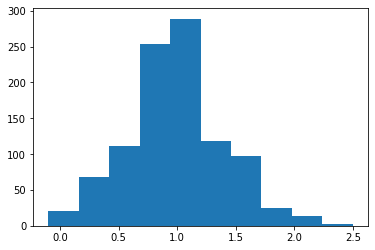

In [2]:
n = 1000
money = np.ones(n)
coin = 0.1
nsteps = 10000

for i in range(nsteps):
    p1 = np.random.randint(low=0, high=n)
    p2 = np.random.randint(low=0, high=n)
    if p1 == p2:
        continue
    if money[p1] > 0:
        money[p1] -= coin
        money[p2] += coin
        
plt.hist(money);        

Add in Gini Index for inequality:

${\displaystyle G(S)=1-{\frac {2}{n-1}}\left(n-{\frac {\sum _{i=1}^{n}iy_{i}}{\sum _{i=1}^{n}y_{i}}}\right).}$

In [3]:
def gini(x):
    y = np.sort(x) # sort by wealth
    upper_sum = 0
    n = len(x)
    for i in range(n):
        upper_sum += (i+1)*y[i]
    return 1-2/(n-1)*( n - upper_sum/sum(y) )

# Test the function to see if it works how it should:

print('This should be 0:',gini([1,1,1,1]))
print('This should be 1:',gini([1,0,0,0]))
print('This should be something else:',gini([10,5,1,1]))
        

This should be 0: 0.0
This should be 1: 1.0
This should be something else: 0.6078431372549019


First attempt to add tax:

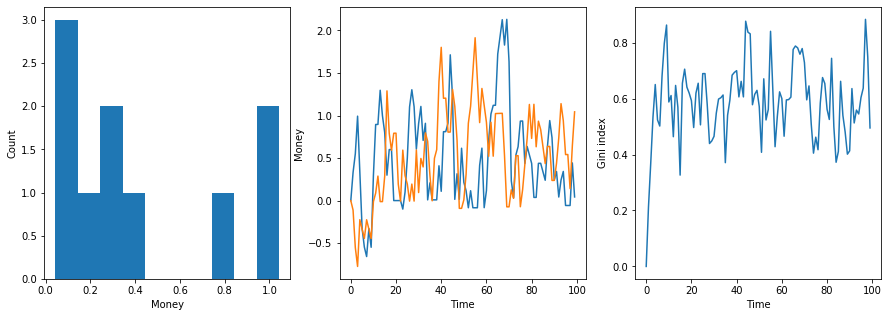

In [4]:
n = 10
coin = 0.1
nsteps = 100
trades_per_step = 10
interest = 0.001
money = np.ones(shape=(nsteps,n))
gini_history = np.zeros(nsteps)
tax = 0.01


for t in range(1,nsteps):
    money[t,:] = money[t-1,:]*(1+interest) # means previous row multiplied by a coefficient. row t = previous t * something

    
    for h in range(n):
        tax_sum = money[h]*tax
        tax_sub = sum(tax_sum)
        money[h] -= tax_sub
        money[h] += tax_sum/n


        for i in range(trades_per_step):
            p1 = np.random.randint(low=0, high=n)
            p2 = np.random.randint(low=0, high=n)
            if p1 == p2:
                continue
            if money[t,p1] > 0:
                money[t,p1] -= coin
                money[t,p2] += coin
        gini_history[t] = gini(money[t,:])
        

# Figures:  

plt.figure(figsize=(15,5)) 
plt.subplot(1,3,1);
plt.hist(money[-1,:], bins=10);
plt.xlabel('Money');
plt.ylabel('Count');

plt.subplot(1,3,2);
poor_person = np.argmin(money[-1,:])
rich_person = np.argmax(money[-1,:])
plt.plot(money[:,poor_person]);
plt.plot(money[:,rich_person]);
plt.xlabel('Time');
plt.ylabel('Money');

plt.subplot(1,3,3);
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');



Problems with this:

* The money goes below 0

* The Gini Index is still quite high

* It does not implement a range of tax values

Second attempt to add tax:

Note: `money[t,:]` means amount of money at current time step for all people 

### Saving values in a loop:

We'll need to remember the values of tax_rate that we try, because we will need them to make the x axis. 

Options:

1. Pre-create an array of all possible values, and later iterate through them.
2. Pre-allocate some space, fill it with zeros, and write values there as you go.
3. Create an empty array using `np.array([])`, then append values to it using `a = np.append(a,new_value)`

### How to organize loops:

If we need a certain parameter (p) to take values from a certain set of possible parameters (possible_ps) in a loop, 

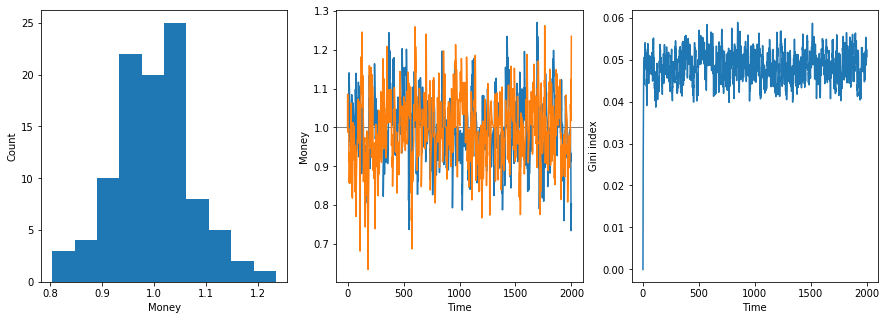

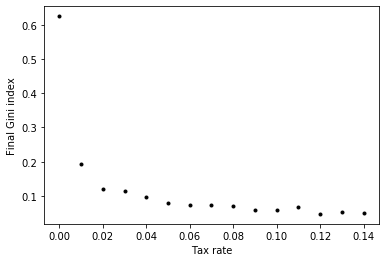

In [39]:
n = 100
coin = 0.1
nsteps = 2000
trades_per_step = 10
interest = 0.000
tax_rate = 0.02

money = np.ones(shape=(nsteps,n))
gini_history = np.zeros(nsteps)
possible_taxes = np.arange(start=0, stop=0.15, step=0.01) # to make x axis of tax rates
final_gini = np.zeros(shape=possible_taxes.shape) # to make y axis of final ginis in the same shape as possible taxes


for itax in range(len(possible_taxes)):
    tax_rate = possible_taxes[itax]
    
    for t in range(1,nsteps):
        money[t,:] = money[t-1,:]*(1+interest) # means previous row multiplied by a coefficient. row t = previous t * something


        for i in range(trades_per_step):
            p1 = np.random.randint(low=0, high=n)
            p2 = np.random.randint(low=0, high=n)
            if p1 == p2:
                continue
            if money[t,p1] > 0:
                money[t,p1] -= coin
                money[t,p2] += coin
        gini_history[t] = gini(money[t,:])

        # It doesn't matter where you put this section, i.e. before or after the trade:
        tax = np.sum(money[t,:])*tax_rate # total tax collected
        money[t,:] = money[t,:]*(1-tax_rate) # each person's wealth gets reduced by amount collected
        money[t,:] += tax/n
    
    final_gini[itax] = gini_history[-1]
        
        
# Figures:  

plt.figure(figsize=(15,5)) 
plt.subplot(1,3,1);
plt.hist(money[-1,:], bins=10);
plt.xlabel('Money');
plt.ylabel('Count');

plt.subplot(1,3,2);
plt.axhline(1,color='gray',linewidth=1);
poor_person = np.argmin(money[-1,:])
rich_person = np.argmax(money[-1,:])
plt.plot(money[:,poor_person]);
plt.plot(money[:,rich_person]);
plt.xlabel('Time');
plt.ylabel('Money');


plt.subplot(1,3,3);
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');


# -------------- Second figure --------------
plt.figure();
plt.plot(possible_taxes, final_gini, 'k.');
plt.xlabel('Tax rate');
plt.ylabel('Final Gini index');